# Density-based spatial clustering of applications with noise (DBSCAN) 
###                                                                                                                                                                                                 - 17119 - Hare Sankaran RV 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle, islice
from sklearn import cluster

In [34]:
figsize = (10,10)
point_size=150
point_border=0.8


def plot_dataset(dataset, xlim=(-15, 15), ylim=(-15, 15)):
    plt.figure(figsize=figsize)
    plt.scatter(dataset[:,0], dataset[:,1], s=point_size, color="#00B3E9", edgecolor='black', lw=point_border)
    plt.show()
    
def plot_clustered_dataset(dataset, y_pred, xlim=(-15, 15), ylim=(-15, 15), neighborhood=False, epsilon=0.5):

    fig, ax = plt.subplots(figsize=figsize)
    
    colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                     '#f65e97', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
    colors = np.append(colors, '#BECBD6')
    
    
    if neighborhood:
        for point in dataset:
            circle1 = plt.Circle(point, epsilon, color='#666666', fill=False, zorder=0, alpha=0.3)
            ax.add_artist(circle1)

    ax.scatter(dataset[:, 0], dataset[:, 1], s=point_size, color=colors[y_pred], zorder=10, edgecolor='black', lw=point_border)
    
    plt.show()
    
def plot_dbscan_grid(dataset, eps_values, min_samples_values):
    
    fig = plt.figure(figsize=(16, 20))
    plt.subplots_adjust(left=.02, right=.98, bottom=0.001, top=.96, wspace=.05,
                        hspace=0.25)


    plot_num = 1

    for i, min_samples in enumerate(min_samples_values):
        for j, eps in enumerate(eps_values):
            ax = fig.add_subplot( len(min_samples_values) , len(eps_values), plot_num)

            dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
            y_pred_2 = dbscan.fit_predict(dataset)

            colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                                 '#f65e97', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred_2) + 1))))
            colors = np.append(colors, '#BECBD6')


            for point in dataset:
                circle1 = plt.Circle(point, eps, color='#666666', fill=False, zorder=0, alpha=0.3)
                ax.add_artist(circle1)

            ax.text(0, -0.03, 'Epsilon: {} \nMin_samples: {}'.format(eps, min_samples), transform=ax.transAxes, fontsize=16, va='top')
            ax.scatter(dataset[:, 0], dataset[:, 1], s=50, color=colors[y_pred_2], zorder=10, edgecolor='black', lw=0.5)


            plt.xticks(())
            plt.yticks(())
            plot_num = plot_num + 1

    plt.show()

In [117]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_csv("ATM.csv",header=None)
dataset_1 = df.values

In [118]:
df.shape

(50, 2)

In [119]:
df.head()

0         1
0  10.94231  76.93460
1  10.94627  76.93156
2  10.94891  76.93509
3  10.94413  76.93978
4  10.94053  76.93599

# Plotting the dataset as it is

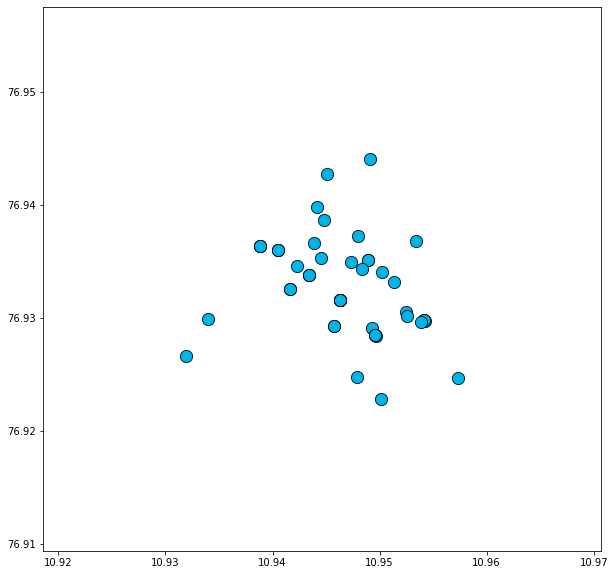

In [71]:
plot_dataset(df.values)

# Normalizing the data

In [37]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

0         1
0 -0.787419  0.444804
1 -0.029328 -0.270270
2  0.476066  0.560063
3 -0.439003  1.663252
4 -1.128177  0.771762

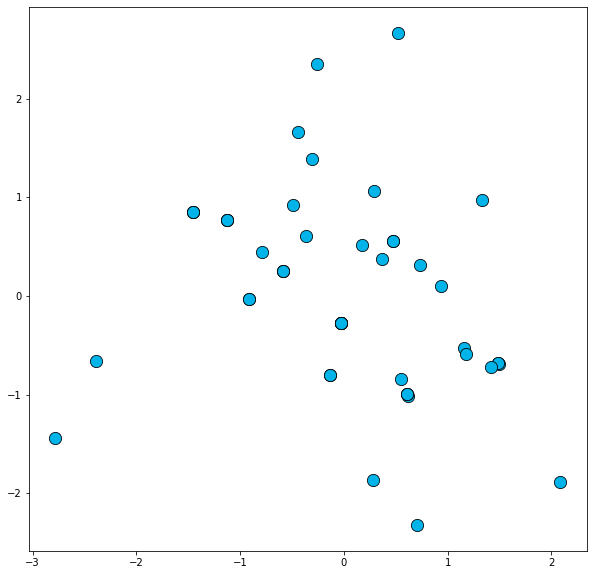

In [38]:
dataset_1 = df_scale.values
plot_dataset(dataset_1)

In [39]:
from mpl_toolkits.mplot3d import Axes3D

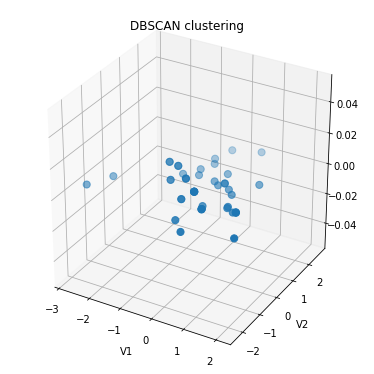

In [121]:
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)
ax.scatter(dataset_1[:, 0], dataset_1[:, 1], s=50)
plt.title("DBSCAN clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

# DBSCAN Clustering with default params

In [50]:
from sklearn import cluster,metrics

dbscan = cluster.DBSCAN()
clustering_labels_1 = dbscan.fit_predict(dataset_1)


n_clusters_ = len(set(clustering_labels_1)) - (1 if -1 in clustering_labels_1 else 0)
n_noise_ = list(clustering_labels_1).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scale, clustering_labels_1))

Estimated number of clusters: 5
Estimated number of noise points: 13
Silhouette Coefficient: 0.350


In [24]:
clustering_labels_1

array([ 0,  1,  2, -1,  0,  1, -1,  0,  0,  3, -1, -1, -1, -1, -1,  0,  0,
        0,  1,  2,  2, -1,  4,  3,  4, -1,  1,  0, -1,  0,  0,  0, -1, -1,
        0,  0,  0,  1, -1,  4,  3,  4,  2,  4,  3,  2,  4,  3,  1,  2])

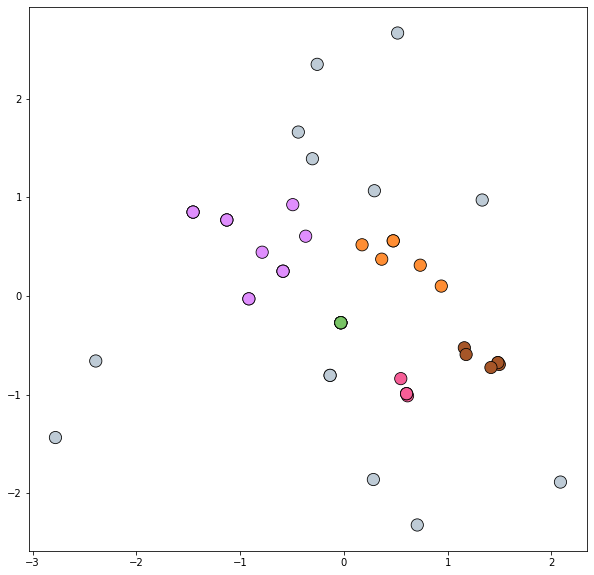

In [23]:
plot_clustered_dataset(dataset_1, clustering_labels_1)

# Neighbourhood

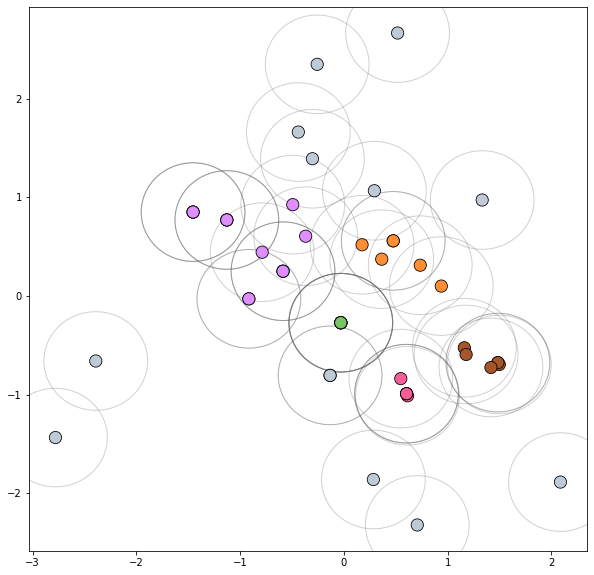

In [25]:
plot_clustered_dataset(dataset_1, clustering_labels_1, neighborhood=True)

# Grid of DBSCAN Clusters

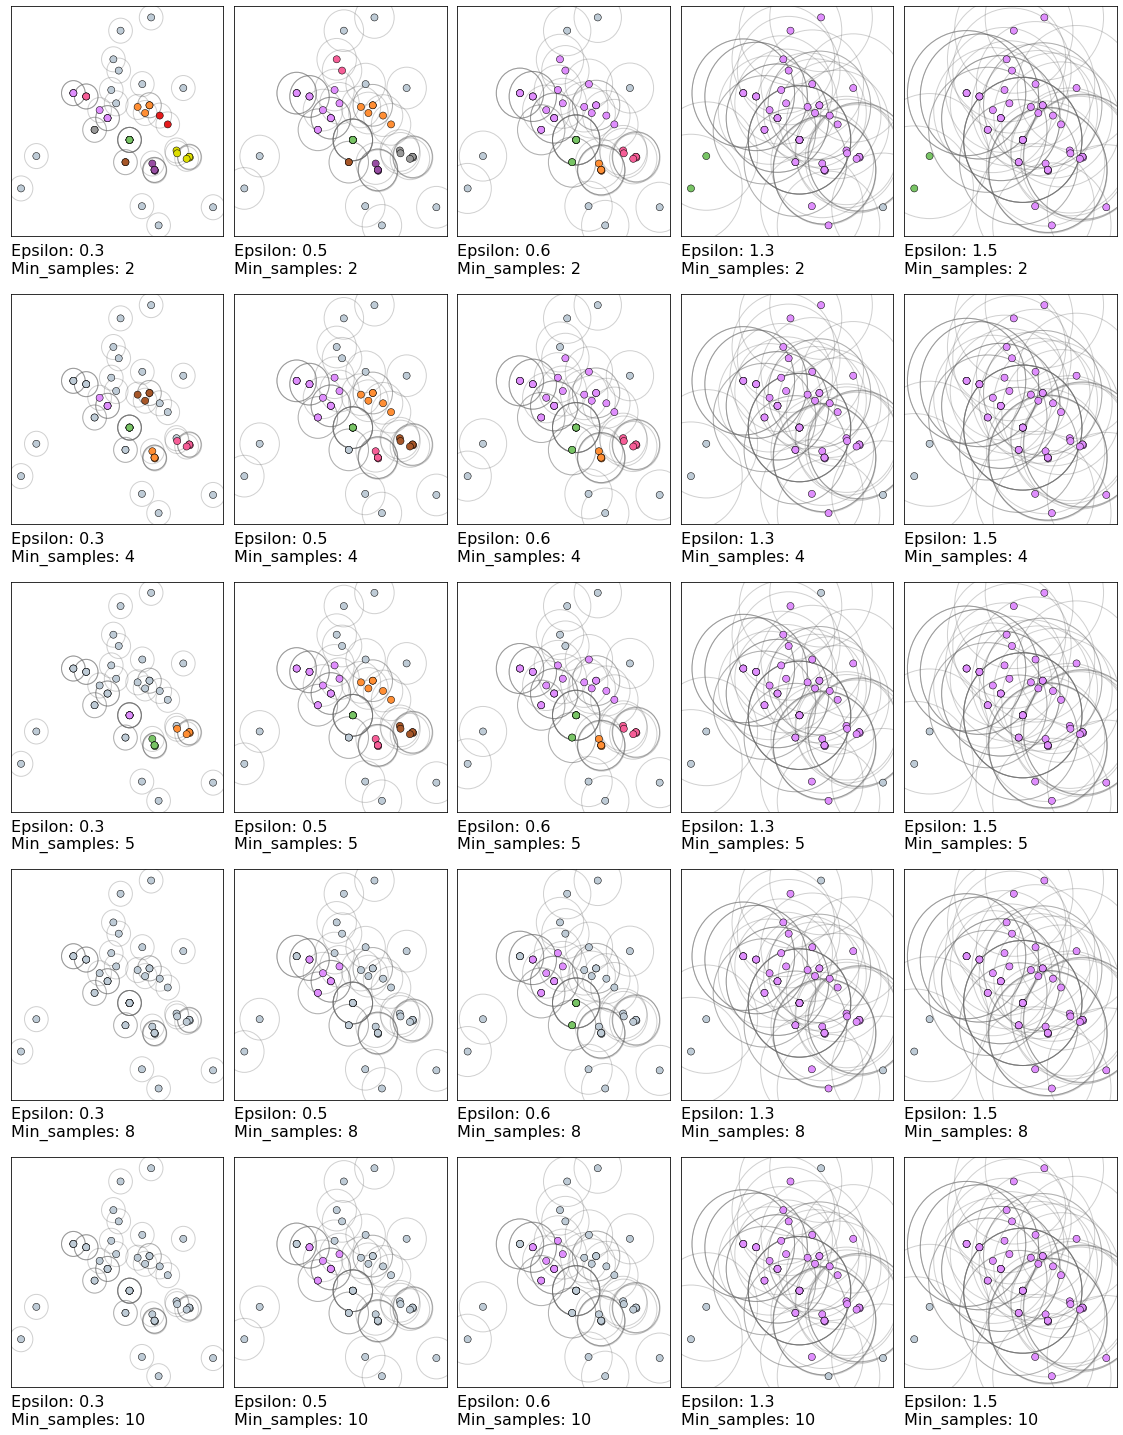

In [116]:
eps_values = [0.3, 0.5, 0.6, 1.3, 1.5]
min_samples_values = [2, 4, 5, 8, 10]

plot_dbscan_grid(dataset_1, eps_values, min_samples_values)

In [91]:
from itertools import product
eps_values = np.arange(0.5,1.7,0.1) 
min_samples = np.arange(2,10) 
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
epsvalues = []
min_samp = []

for p in dbscan_params:
    dbscan_cluster = cluster.DBSCAN(eps=p[0], min_samples=p[1]).fit(df_scale)
    epsvalues.append(p[0])
    min_samp.append(p[1])
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_))-1)
    sil_score.append(silhouette_score(df, dbscan_cluster.labels_))
    eps_min = list(zip(no_of_clusters, sil_score, epsvalues,min_samp))

    
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])    
eps_min_df

no_of_clusters  silhouette_score  epsilon_values  minimum_points
0                7          0.415271             0.5               2
1                5          0.345351             0.5               3
2                5          0.345351             0.5               4
3                5          0.345351             0.5               5
4                3          0.151078             0.5               6
..             ...               ...             ...             ...
91               1          0.489871             1.6               5
92               1          0.489871             1.6               6
93               1          0.489871             1.6               7
94               1          0.489871             1.6               8
95               1          0.489871             1.6               9

[96 rows x 4 columns]

In [98]:
eps_min_df.sort_values(by=['no_of_clusters'],ascending=False)

no_of_clusters  silhouette_score  epsilon_values  minimum_points
0                7          0.415271             0.5               2
1                5          0.345351             0.5               3
2                5          0.345351             0.5               4
3                5          0.345351             0.5               5
11               4          0.246006             0.6               5
..             ...               ...             ...             ...
46               1          0.385537             1.0               8
45               1          0.407942             1.0               7
44               1          0.428787             1.0               6
43               1          0.428787             1.0               5
95               1          0.489871             1.6               9

[96 rows x 4 columns]

In [86]:
eps_min_df.sort_values(by=['silhouette_score'],ascending=False)

no_of_clusters  silhouette_score  epsilon_values  minimum_points
95               1          0.489871             1.6               9
83               1          0.489871             1.5               5
72               1          0.489871             1.4               2
74               1          0.489871             1.4               4
75               1          0.489871             1.4               5
..             ...               ...             ...             ...
15               1          0.135394             0.6               9
7                1          0.113308             0.5               9
6                1          0.113308             0.5               8
13               2          0.090264             0.6               7
14               2          0.051684             0.6               8

[96 rows x 4 columns]

# Purely clustering based on high Silhoutte Index will give only 1 cluster. So you have to be clever enough to identify trade off between Silhoutte & No_of_clusters for better clustering

Estimated number of clusters: 1
Estimated number of noise points: 2
Silhouette Coefficient: 0.466


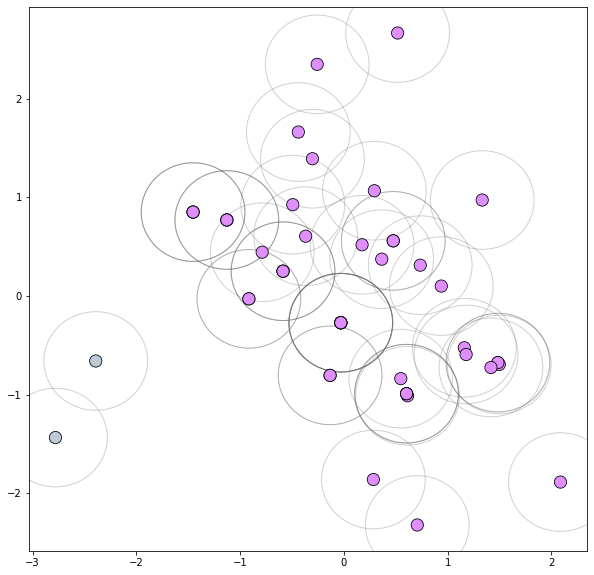

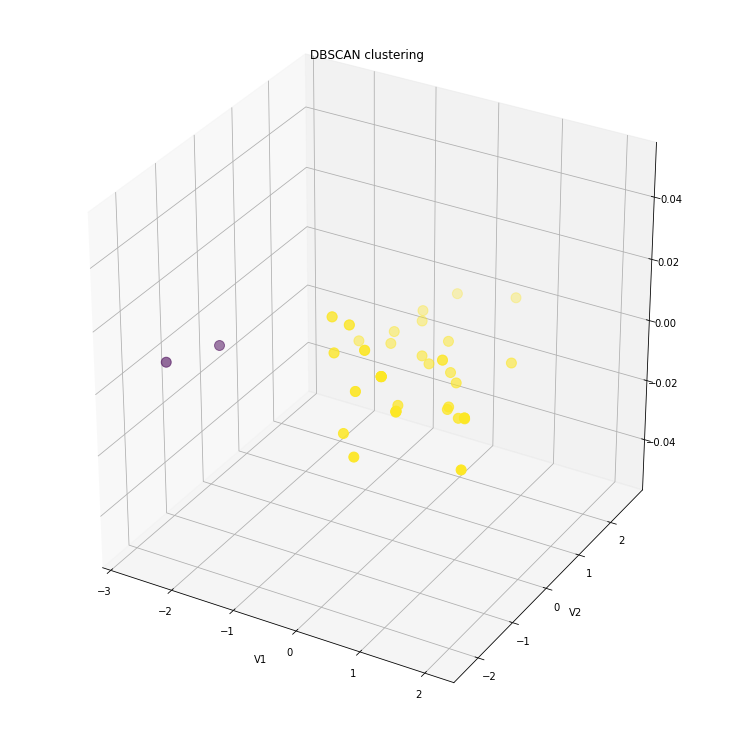

In [114]:
dbscan = cluster.DBSCAN(eps=1.6, min_samples=9)
clustering_labels_1 = dbscan.fit_predict(dataset_1)


n_clusters_ = len(set(clustering_labels_1)) - (1 if -1 in clustering_labels_1 else 0)
n_noise_ = list(clustering_labels_1).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scale, clustering_labels_1))

plot_clustered_dataset(dataset_1, clustering_labels_1,neighborhood=True)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataset_1[:, 0], dataset_1[:, 1], c=clustering_labels_1 ,s=100, cmap="viridis")
plt.title("DBSCAN clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

Estimated number of clusters: 7
Estimated number of noise points: 9
Silhouette Coefficient: 0.420


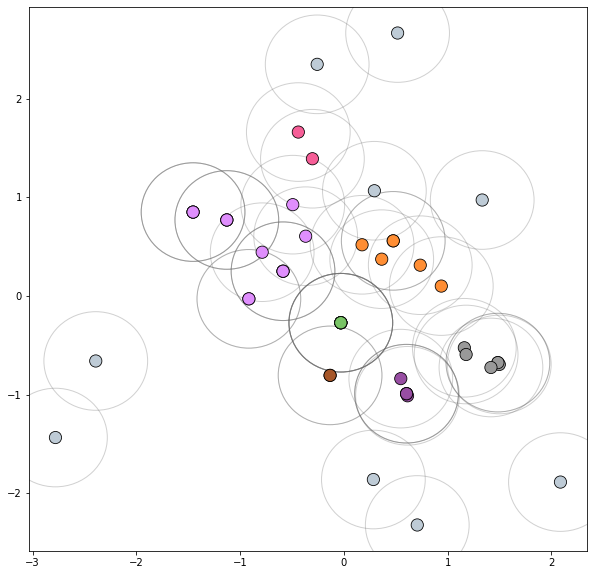

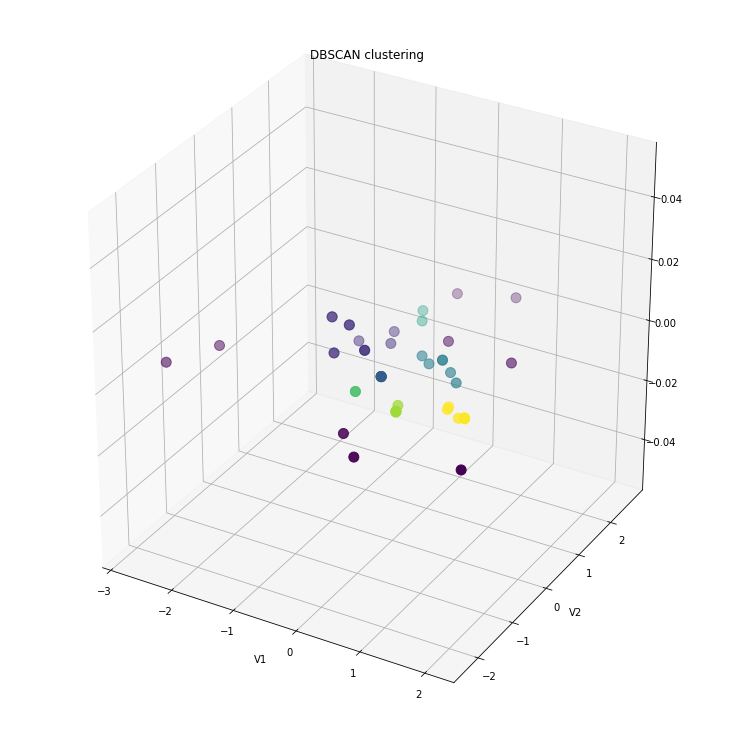

In [113]:
dbscan = cluster.DBSCAN(eps=0.5, min_samples=2)
clustering_labels_1 = dbscan.fit_predict(dataset_1)


n_clusters_ = len(set(clustering_labels_1)) - (1 if -1 in clustering_labels_1 else 0)
n_noise_ = list(clustering_labels_1).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scale, clustering_labels_1))

plot_clustered_dataset(dataset_1, clustering_labels_1,neighborhood=True)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataset_1[:, 0], dataset_1[:, 1], c=clustering_labels_1 ,s=100, cmap="viridis")
plt.title("DBSCAN clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

Estimated number of clusters: 5
Estimated number of noise points: 13
Silhouette Coefficient: 0.350


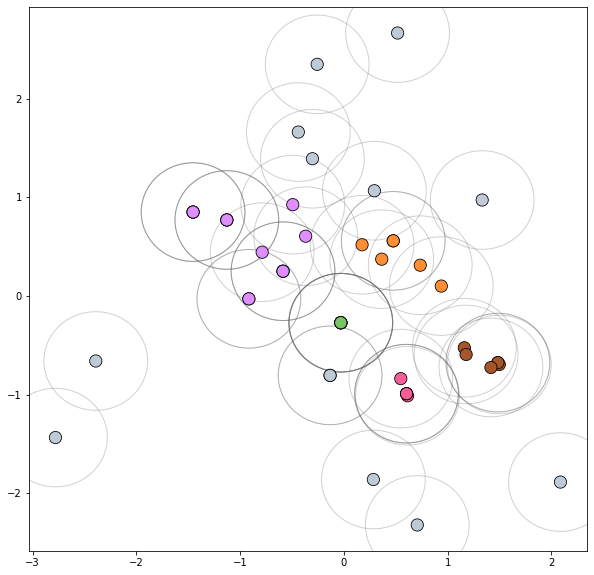

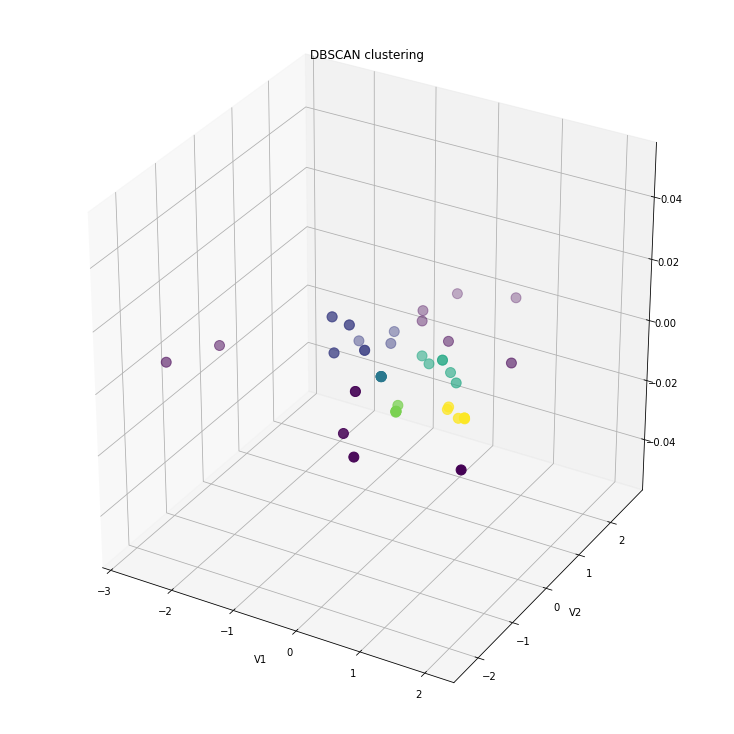

In [112]:
dbscan = cluster.DBSCAN(eps=0.5, min_samples=3)
clustering_labels_1 = dbscan.fit_predict(dataset_1)


n_clusters_ = len(set(clustering_labels_1)) - (1 if -1 in clustering_labels_1 else 0)
n_noise_ = list(clustering_labels_1).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scale, clustering_labels_1))

plot_clustered_dataset(dataset_1, clustering_labels_1,neighborhood=True)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataset_1[:, 0], dataset_1[:, 1], c=clustering_labels_1 ,s=100, cmap="viridis")
plt.title("DBSCAN clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 10
Silhouette Coefficient: 0.266


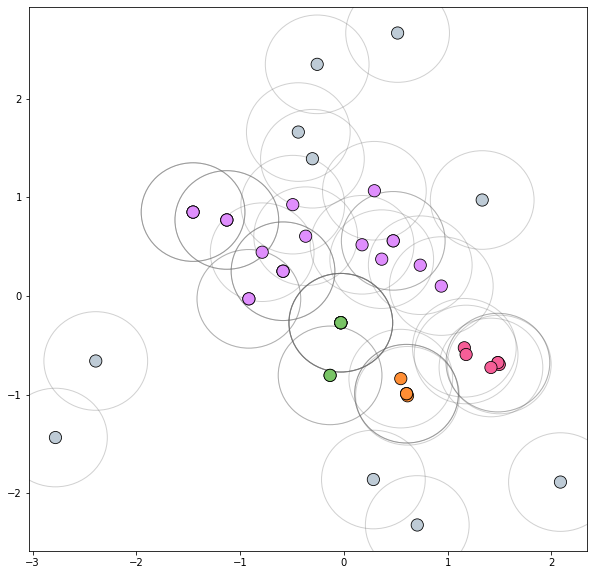

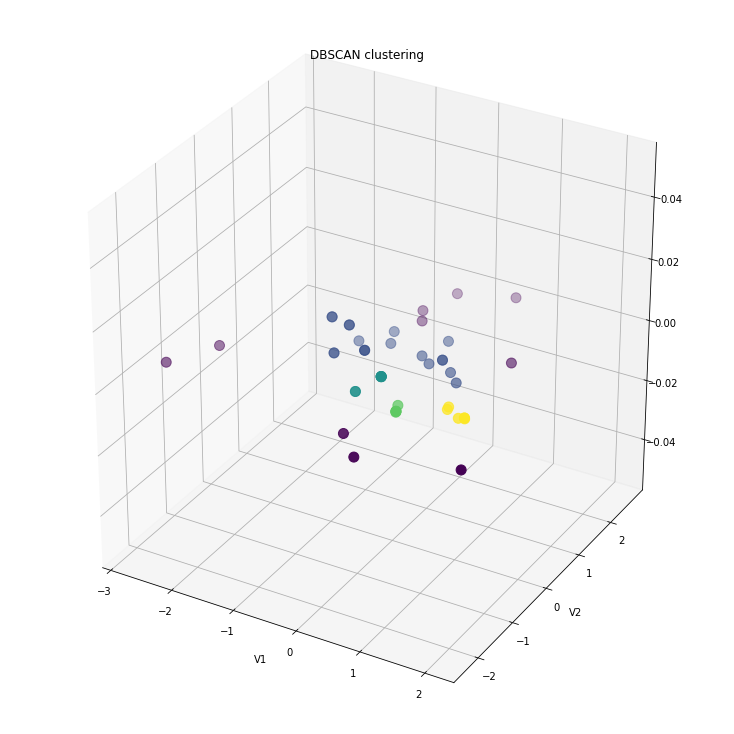

In [111]:
dbscan = cluster.DBSCAN(eps=0.6, min_samples=5)
clustering_labels_1 = dbscan.fit_predict(dataset_1)


n_clusters_ = len(set(clustering_labels_1)) - (1 if -1 in clustering_labels_1 else 0)
n_noise_ = list(clustering_labels_1).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_scale, clustering_labels_1))

plot_clustered_dataset(dataset_1, clustering_labels_1,neighborhood=True)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(dataset_1[:, 0], dataset_1[:, 1], c=clustering_labels_1 ,s=100, cmap="viridis")
plt.title("DBSCAN clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()